# Social Network Ads DATASET

## (Predicting if user buys the product based from ads)

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as scs

In [427]:
df = pd.read_csv("../ml_datasets/Social_Network_Ads.csv")

In [428]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [429]:
df.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [430]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [431]:
del df['User ID']

In [432]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [433]:
df.isna().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [434]:
df['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [435]:
df.shape

(400, 4)

#### Convert gender to numerical value

In [436]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

### Copying for future use

In [437]:
df1 = df.copy()


In [438]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [439]:
df['Gender'].value_counts()

Gender
0    204
1    196
Name: count, dtype: int64

### Feauture Scaling of data 

In [440]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df['Age'] = mm.fit_transform(df[['Age']])
df['EstimatedSalary'] = mm.fit_transform(df[['EstimatedSalary']])

In [441]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,0.023810,0.029630,0
1,1,0.404762,0.037037,0
2,0,0.190476,0.207407,0
3,0,0.214286,0.311111,0
4,1,0.023810,0.451852,0


In [442]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

### Separting x and y values

In [443]:
x = df.iloc[:, :3]
y = df['Purchased']

In [444]:
x.head()

,Gender,Age,EstimatedSalary
0,1,0.023810,0.029630
1,1,0.404762,0.037037
2,0,0.190476,0.207407
3,0,0.214286,0.311111
4,1,0.023810,0.451852


In [445]:
x.shape, y.shape

((400, 3), (400,))

### splitting into train test for preparing model

In [446]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.20)

In [447]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [448]:
lr.coef_, lr.intercept_

(array([[0.13854584, 5.19175332, 2.31193733]]), array([-4.19980552]))

#### Model =  e^(0.026 Gender + 4.97 Age + 2.537 Salary - 4.24) / (1 + e^(0.026 Gender + 4.97 Age + 2.537 Salary - 4.24))

In [449]:
lr.classes_

array([0, 1])

In [450]:
ypred = lr.predict(xtest)

### Draw confusion matrix for evaluating the predicated values

<Axes: >

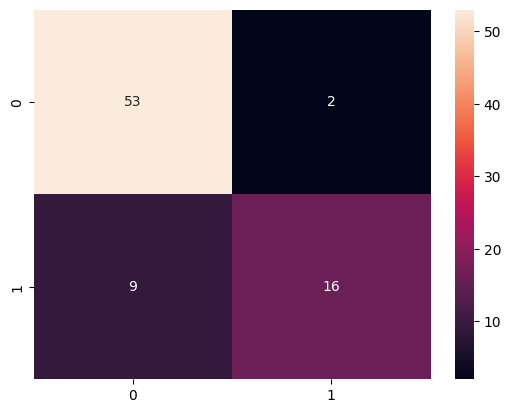

In [451]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
scs.heatmap(cm, annot=True)

In [452]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
print("Accuracy: ", accuracy_score(ytest, ypred))
print("Precision: ", precision_score(ytest, ypred))
print("Recall_score: ", recall_score(ytest, ypred))
print("F1_score: ", f1_score(ytest, ypred))
print("Roc Auc Score: ", roc_auc_score(ytest, ypred))
auc = roc_auc_score(ytest, ypred)

Accuracy:  0.8625
Precision:  0.8888888888888888
Recall_score:  0.64
F1_score:  0.7441860465116279
Roc Auc Score:  0.8018181818181819


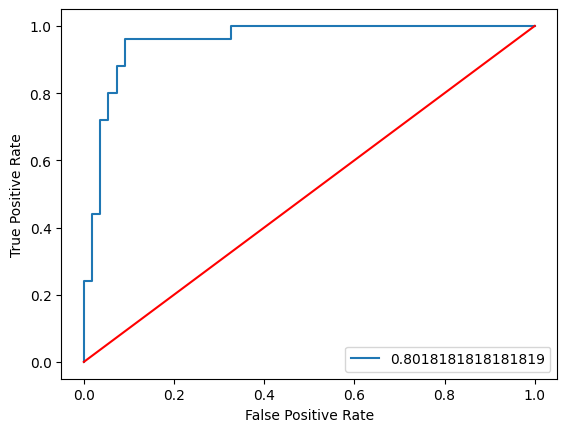

In [453]:
from sklearn.metrics import roc_curve
fpr, tpr, threshol = roc_curve(ytest, lr.predict_proba(xtest)[:,1])
plt.plot(fpr, tpr, label=auc)
plt.plot([0,1], [0,1],"r")
plt.xlabel(f"False Positive Rate")
plt.ylabel(f"True Positive Rate")
plt.legend()
plt.show()

<Axes: xlabel='Age', ylabel='Purchased'>

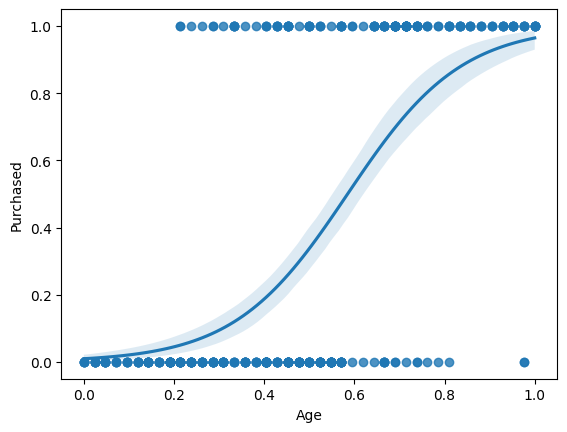

In [462]:
scs.regplot(x=df['Age'], y=df['Purchased'], logistic=True)

## TASK TO DO: Take input from user and predict the value

In [454]:
df.count()

Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

In [455]:
df1.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [456]:
while True:
    # Input Data to predict
    gender = int(input("Choose : 0. Female \t 1. Male"))
    age = int(input("Enter age: "))
    salary = float(input("Enter estimated salary: "))
    
    # Prepare to scale down
    data = {"Gender" : [gender], "Age" : [age], "EstimatedSalary" : [salary]}
    print("Used Input: ", data)
    new_df = pd.DataFrame(data)
    df1 = pd.concat([df1,new_df], ignore_index=True)
    df1.reset_index()
    
    # Scale the values for predition
    df1['Age'] = mm.fit_transform(df1[['Age']])
    df1['EstimatedSalary'] = mm.fit_transform(df1[['EstimatedSalary']])
    
    # Predict if user purchased
    x = df1.iloc[-1:,:3]
    ypred = lr.predict(x)
    print("User Purchased: ",end="") 
    if ypred[0] == 0:  
        print("No") 
    else: 
        print("Yes")
        
    ch = input("Check for new data(y,n): ")
    if(ch == 'n' or ch =='x'):
        break


Used Input:  {'Gender': [1], 'Age': [44], 'EstimatedSalary': [424242.0]}
User Purchased: Yes


In [457]:

df1.tail()

,Gender,Age,EstimatedSalary,Purchased
396,1,0.785714,0.019548,1.0
397,0,0.761905,0.012218,1.0
398,1,0.428571,0.043984,0.0
399,0,0.738095,0.051314,1.0
400,1,0.619048,1.000000,NaN
